In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [55]:
@jit(nopython = True)
def Solver(n,m,T):
    x = np.linspace(0,1,n)
    t = np.linspace(0,T,m)
    u = np.zeros((n,m))
    u[:,1] = np.sin(np.pi*x)
    u[:,0] = np.sin(np.pi*x)

    C = (t[1]-t[0])/(x[1]-x[0])

    for j in range(2,m):
        for i in range(1,n-1):
            u[i,j] = -u[i,j-2]+2*u[i,j-1]+(u[i+1,j-1]-2*u[i,j-1]+u[i-1,j-1])*(C**2)
    return x, t, u, C

In [124]:
n = 102
m = 501
T = 5

x,t,u,C = Solver(n,m,T)
T,X = np.meshgrid(t,x)
u_ = np.cos(np.pi*T)*np.sin(np.pi*X)

C = 1.01


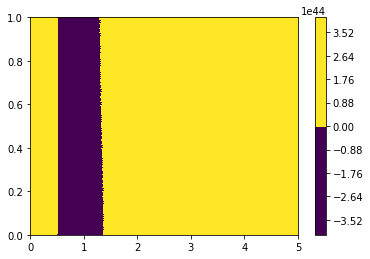

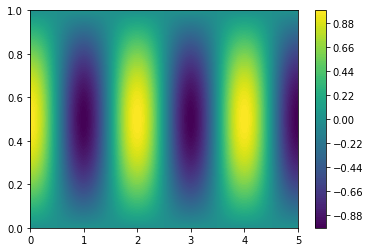

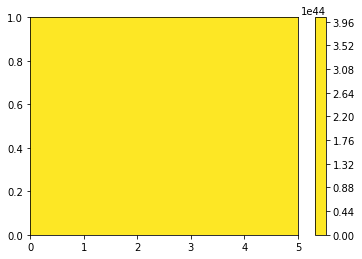

In [125]:

plt.figure()
plt.contourf(t,x,u,100,vmax = 1, vmin = -1)
plt.colorbar()
plt.figure()
plt.contourf(t,x,u_,100,vmax = 1, vmin = -1)
plt.colorbar()
plt.figure()
plt.contourf(t,x,abs(u_-u),100,vmax = 1, vmin = -1)
plt.colorbar()
print('C = ' + str(C))

C = 1.01


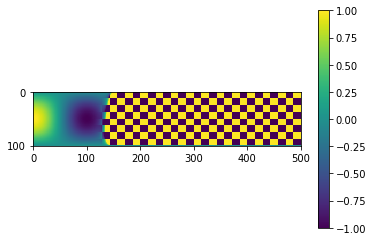

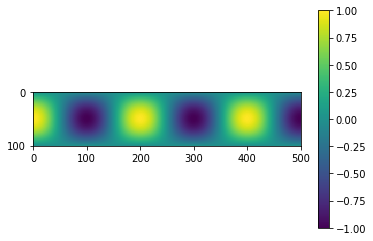

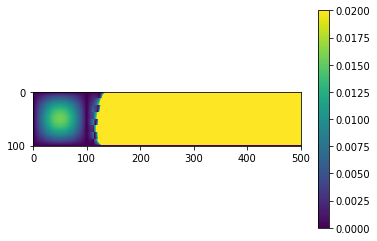

In [128]:
plt.figure()
plt.imshow(u,vmax = 1, vmin = -1)
plt.colorbar()
plt.figure()
plt.imshow(u_,vmax = 1, vmin = -1)
plt.colorbar()
plt.figure()
plt.imshow(abs(u_-u),vmax = 0.02, vmin = 0)
plt.colorbar()
print('C = ' + str(C))

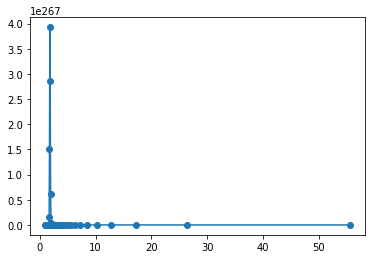

In [86]:
plt.plot(C,Err,'-o')


In [112]:
#n = 101
m = 2501
T = 5

N = np.arange(11,501,10)
C = np.zeros_like(N,dtype=np.double())
Err = np.zeros_like(C)
for i in range(np.size(N)):
    x,t,u,C[i] = Solver(N[i],m,T)
    T1,X1 = np.meshgrid(t,x)
    u_ = np.cos(np.pi*T1)*np.sin(np.pi*X1)
    Err[i] = np.mean(abs(u-u_))
    


Text(0, 0.5, 'Err')

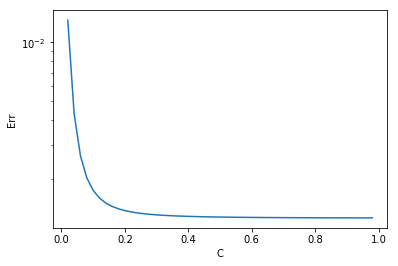

In [118]:
plt.plot(C,Err)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('Err')

In [114]:
C[-1]

0.98